# Principles of Finance BTM 102, Final Portfolio Construction Class Project
### Set Up 1 

Modern portfolio theory (MPT) is a theory on how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. According to the theory, it's possible to construct an "efficient frontier" of optimal portfolios offering the maximum possible expected return for a given level of risk.

MPT shows that an investor can construct a portfolio of multiple assets that will maximize returns for a given level of risk. Likewise, given a desired level of expected return, an investor can construct a portfolio with the lowest possible risk. Based on statistical measures such as variance and correlation, an individual investment's return is less important than how the investment behaves in the context of the entire portfolio.

Source: https://www.investopedia.com/terms/m/modernportfoliotheory.asp

##### Disclosure: Stocks mentioned in this portfolio should not be taken as a recommendation to buy or sell any security. This portfolio was created for perspective research only using Financial Engineering strategies for portfolio management and optimization. Statistical data within this project are thoroughly researched and believed to be accurate using Yahoo Finance API. However, discrepancies can occur with the data provided.  As an investor you should conduct your own research and recheck  for any missing data before making any final decisions regarding buying or selling any stocks. Past performances of stocks mentioned in this portfolio are not a guarantee of future performances.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

pd.options.display.float_format = '{:.2f}'.format

In [2]:
Final_Stocks = pd.read_csv("Final_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]

Gathering stock data from 2/21/20 which was the day before COVID-19 affected the market to recent close:

In [3]:
Final_Stocks = Final_Stocks.loc["2020-2-21":"2020-6-5"]

In [4]:
Final_Stocks.tail().dropna()

,AAPL,AMD,ATOM,ATVI,AXP,BABA,BWXT,COST,DPZ,FB,...,NKE,NVDA,SFM,SHOP,SQ,TSLA,TTD,V,WEN,WM
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-29,317.94,53.80,8.68,71.98,95.07,207.39,62.57,308.47,385.84,225.09,...,98.58,354.86,25.13,757.80,81.08,835.00,311.56,195.24,21.26,106.22
2020-06-01,321.85,53.63,8.60,72.99,96.75,206.57,61.94,308.29,383.58,231.91,...,99.54,352.09,25.48,758.00,82.72,898.10,310.31,194.35,21.90,105.49
2020-06-02,323.34,53.54,9.06,72.98,99.07,214.33,62.02,307.09,384.86,232.72,...,100.74,352.85,25.77,779.50,88.00,881.56,318.26,196.36,21.94,106.90
2020-06-03,325.12,52.73,8.98,69.92,105.40,218.61,62.04,306.64,390.14,230.16,...,104.11,350.62,25.62,762.02,91.97,882.96,354.98,196.87,22.18,109.67
2020-06-04,322.32,52.63,9.36,69.81,106.54,218.04,61.18,310.75,382.78,226.29,...,101.28,350.66,24.93,735.19,87.72,864.38,337.24,193.64,21.94,107.99


This function is used to calculate a summary of daily returns and to create a column for Returns and Risks of the stocks mentioned in the portfolio: 

In [5]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

Daily Returns since the impact of COVID-19:

In [6]:
ret = Final_Stocks.pct_change().dropna()

In [7]:
ret.tail().dropna()

,AAPL,AMD,ATOM,ATVI,AXP,BABA,BWXT,COST,DPZ,FB,...,NKE,NVDA,SFM,SHOP,SQ,TSLA,TTD,V,WEN,WM
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-29,-0.00,0.04,-0.02,0.03,-0.03,0.04,-0.01,-0.00,0.06,-0.00,...,0.00,0.05,0.01,0.02,0.02,0.04,0.04,0.01,0.00,0.00
2020-06-01,0.01,-0.00,-0.01,0.01,0.02,-0.00,-0.01,-0.00,-0.01,0.03,...,0.01,-0.01,0.01,0.00,0.02,0.08,-0.00,-0.00,0.03,-0.01
2020-06-02,0.00,-0.00,0.05,-0.00,0.02,0.04,0.00,-0.00,0.00,0.00,...,0.01,0.00,0.01,0.03,0.06,-0.02,0.03,0.01,0.00,0.01
2020-06-03,0.01,-0.02,-0.01,-0.04,0.06,0.02,0.00,-0.00,0.01,-0.01,...,0.03,-0.01,-0.01,-0.02,0.05,0.00,0.12,0.00,0.01,0.03
2020-06-04,-0.01,-0.00,0.04,-0.00,0.01,-0.00,-0.01,0.01,-0.02,-0.02,...,-0.03,0.00,-0.03,-0.04,-0.05,-0.02,-0.05,-0.02,-0.01,-0.02


Risk and Return due to the impact of COVID-19:

In [8]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,0.32,0.65
AMD,0.27,0.80
ATOM,2.98,1.21
ATVI,0.53,0.58
AXP,-0.29,1.03
BABA,0.18,0.44
BWXT,-0.27,0.61
COST,-0.01,0.47
DPZ,0.25,0.54
FB,0.45,0.62


Risk/Return Analysis: The stock in the this portoflio with the highest risk is WEN and the stock with the highest return is ATOM. A question we should always be asking ourselves when entering a new position, "is the risk worth the potential reward?". 

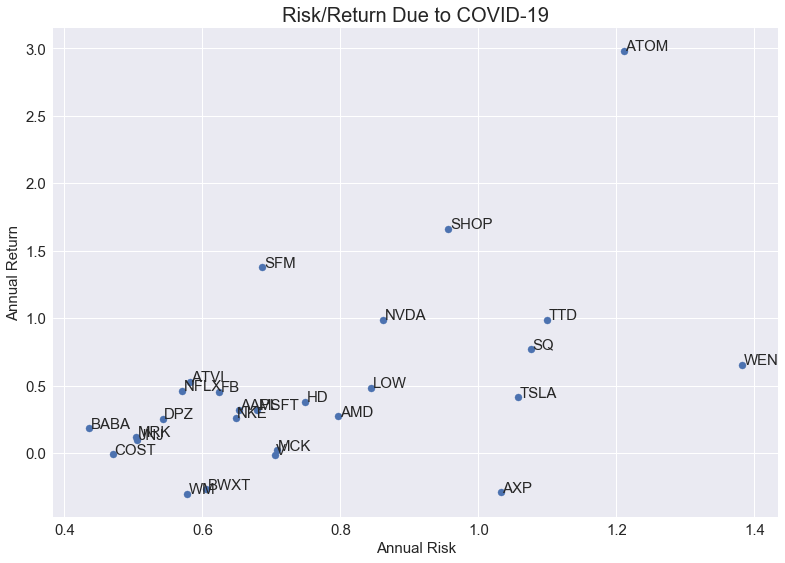

In [9]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Annual Risk", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Risk/Return Due to COVID-19", fontsize = 20)
plt.show()

Number of assets in the portfolio (27), and 200,000 simulations of portfolios:

In [11]:
noa = len(Final_Stocks.columns)
nop = 200000
print(noa, nop)

27 200000


Creating simulation:

The Purpose of np.random.seed(123) is to prevent the values from repeating the same result. It makes sure we obtain differnt values for the simulation 

In [12]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

200,000 different weight combinations for each stock in the portfolio:

In [13]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)
weights

array([[0.05048218, 0.02074024, 0.01644288, ..., 0.05236487, 0.02340904,
        0.02622353],
       [0.01704518, 0.02193262, 0.04711711, ..., 0.06170565, 0.04503253,
        0.04070206],
       [0.02594558, 0.02302049, 0.03156659, ..., 0.01158671, 0.05264826,
        0.0241291 ],
       ...,
       [0.04787663, 0.01338044, 0.0092217 , ..., 0.05802942, 0.045472  ,
        0.03057947],
       [0.02224503, 0.03777723, 0.0313592 , ..., 0.01037216, 0.02268106,
        0.05028016],
       [0.04011102, 0.04035787, 0.06272431, ..., 0.03971056, 0.01608201,
        0.07547299]])

In [14]:
weights.sum(axis = 1, keepdims= True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

Daily Returns of 200,000 portfolios:

In [15]:
port_ret = ret.dot(weights.T)

In [16]:
port_ret.tail().dropna()

,0,1,2,3,4,5,6,7,8,9,...,199990,199991,199992,199993,199994,199995,199996,199997,199998,199999
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-29,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.01,0.02,0.01,...,0.02,0.01,0.01,0.02,0.02,0.01,0.02,0.01,0.01,0.01
2020-06-01,0.01,0.01,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.01
2020-06-02,0.01,0.02,0.01,0.01,0.01,0.01,0.02,0.01,0.02,0.02,...,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.02
2020-06-03,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.00,...,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2020-06-04,-0.01,-0.01,-0.01,-0.01,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01


Annual Risk and Return of 200,000 Portfolios

In [17]:
port_summary = ann_risk_return(port_ret)

In [18]:
port_summary.tail().dropna()

,Return,Risk
199995,0.54,0.62
199996,0.48,0.59
199997,0.33,0.57
199998,0.42,0.58
199999,0.48,0.62


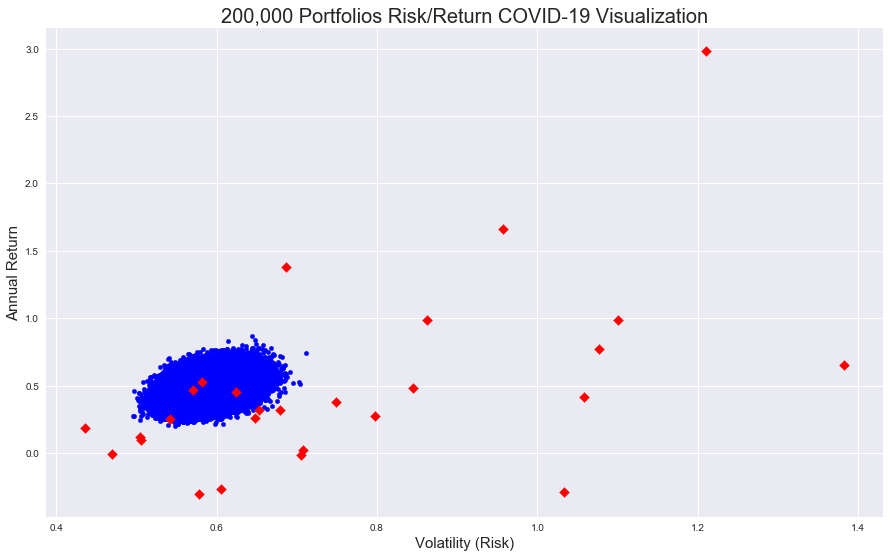

In [19]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "blue")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "red", marker = "D")
plt.xlabel('Volatility (Risk)', fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("200,000 Portfolios Risk/Return COVID-19 Visualization", fontsize = 20)
plt.show()

## Portfolio Analysis With The Sharpe Ratio

Sharpe Ratio is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

Since the Portfolio is from Feb 21 2020 to June 6 2020, we're going to be using the 6 month government bond as the Risk Free Rate, which is at 0.18% during the time when I checked the treasury yield making this case study. https://www.bloomberg.com/markets/rates-bonds/government-bonds/us use this website to track the treasury yields.

The risk-free rate of return is the theoretical rate of return of an investment with zero risk. The risk-free rate represents the interest an investor would expect from an absolutely risk-free investment over a specified period of time. In theory, the risk-free rate is the minimum return an investor expects for any investment because he will not accept additional risk unless the potential rate of return is greater than the risk-free rate. In practice, however, the risk-free rate does not exist because even the safest investments carry a very small amount of risk. Thus, the interest rate on a three-month U.S. Treasury bill is often used as the risk-free rate for U.S.-based investors.
https://www.investopedia.com/terms/r/risk-freerate.asp

In [20]:
risk_free_return = 0.018
risk_free_risk = 0

In [21]:
rf = [risk_free_return, risk_free_risk]
rf

[0.018, 0]

Sharpe Ratios for stocks in the portfolio:

In [22]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe
AAPL,0.32,0.65,0.47
AMD,0.27,0.80,0.32
ATOM,2.98,1.21,2.45
ATVI,0.53,0.58,0.88
AXP,-0.29,1.03,-0.30
BABA,0.18,0.44,0.38
BWXT,-0.27,0.61,-0.47
COST,-0.01,0.47,-0.06
DPZ,0.25,0.54,0.43
FB,0.45,0.62,0.70


Stock Sharpe Ratio Analysis: Stocks with positive sharpe ratios, we're expecting postive performances. Stocks with negative sharpe ratios we're expecting negative performances

Portfolio Sharpe Ratios:

In [23]:
port_summary["Sharpe"] = (port_summary["Return"].sub(rf[0]))/port_summary["Risk"]

In [24]:
port_summary.tail().dropna()

,Return,Risk,Sharpe
199995,0.54,0.62,0.85
199996,0.48,0.59,0.79
199997,0.33,0.57,0.54
199998,0.42,0.58,0.69
199999,0.48,0.62,0.74


Results of 200,000 porfolios simulations:

In [25]:
port_summary.describe()

,Return,Risk,Sharpe
count,200000.00,200000.00,200000.00
mean,0.49,0.59,0.79
std,0.08,0.02,0.12
min,0.20,0.50,0.33
25%,0.43,0.57,0.71
50%,0.49,0.59,0.79
75%,0.54,0.60,0.88
max,0.87,0.71,1.32


out of 200,000 portfolio simulations, our maximum results lead to an 0.87% return, 0.71% risk and sharpe ratio of 132. The best performing portfolios usually have a Sharpe Ratios with 1 or above which is ideal to look for. In over all return of this portfolio combination is greater then risk. 

Plot 200,000 Portfolio Sharpe Ratio Performances. "vmin" comes from "25%", "vmax" comes from max sharpe ratio, and "alpha" comes from "max return" this is also a trial and error process to get the most out of the chart. data inputs comform the describe chart.

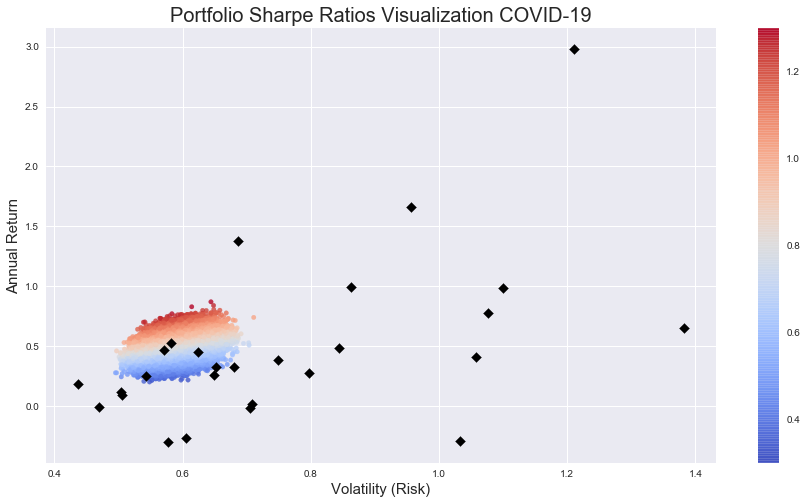

In [26]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = .3, vmax = 1.3, alpha = .8)
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("Volatility (Risk)", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Portfolio Sharpe Ratios Visualization COVID-19", fontsize = 20)
plt.show()

## The Optimal Portfolio - "Max Sharpe Ratio Portfolio"

Out of 200,000 simulated allocations, the "best portfolio" is portfolio 22,637:

In [27]:
msrp = port_summary.Sharpe.idxmax()
msrp

22637

Results of the Max Sharpe Ratio Portfolio:

In [28]:
port_summary.loc[msrp]

Return   0.87
Risk     0.64
Sharpe   1.32
Name: 22637, dtype: float64

The "optimal weights" of the portfolio:

In [29]:
msrp_w = weights[msrp, :]
msrp_w

array([0.00056856, 0.10815542, 0.09484226, 0.02616834, 0.0068331 ,
       0.00580101, 0.00581299, 0.01142684, 0.01739943, 0.04128705,
       0.00427223, 0.01518652, 0.03459653, 0.02598457, 0.0943021 ,
       0.03628948, 0.01779109, 0.01342127, 0.03005159, 0.09397005,
       0.1002894 , 0.08996668, 0.00666078, 0.00603606, 0.00745678,
       0.09990535, 0.00552451])

out of 200,000 portfolio, "The Best Portfolio" consist of the following combinations:

In [31]:
pd.Series(index = Final_Stocks.columns, data = msrp_w)

AAPL   0.00
AMD    0.11
ATOM   0.09
ATVI   0.03
AXP    0.01
BABA   0.01
BWXT   0.01
COST   0.01
DPZ    0.02
FB     0.04
HD     0.00
JNJ    0.02
LOW    0.03
MCK    0.03
MRK    0.09
MSFT   0.04
NFLX   0.02
NKE    0.01
NVDA   0.03
SFM    0.09
SHOP   0.10
SQ     0.09
TSLA   0.01
TTD    0.01
V      0.01
WEN    0.10
WM     0.01
dtype: float64

"Best Portfolio" Analysis: Notice the optimal portfolio, has 0% AAPL, 0% HD, 10% SHOP, and 10% WEN allocations.

###  Finding the "absolute optimal portfolio" with scipy, an optimization algorithm

In [32]:
import pandas as pd
import numpy as np
import scipy.optimize as sco
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress = True)

Risk Free Rate:

In [33]:
rf = 0.018

Annualized portfolio return (based on weights):

In [34]:
def port_ret(weights):
    return ret.dot(weights.T).mean() * 252

Annualized portfolio volatility (based on weights):

In [35]:
def port_vol(weights):
    return ret.dot(weights.T).std() * np.sqrt(252)

In [36]:
def min_func_sharpe(weights): 
     return (rf - port_ret(weights)) / port_vol(weights) #sharpe ratio * (-1)

Number of assets in the portfolio:

In [37]:
noa = len(ret.columns)
noa

27

In order to find the absolute optimal portfolio we must set all stocks to equal weights:

In [38]:
eweigths = np.full(noa, 1/noa)
eweigths

array([0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
       0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
       0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
       0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
       0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
       0.03703704, 0.03703704])

constraint: weights must sum up to 1 -> sum of weights - 1 = 0

In [39]:
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

bounds: all weights shall be between 0 and 1 -> can be changed

In [40]:
bnds =  tuple((0,1) for x in range(noa))

Optimization based on function to be minimized, starting with equal weights and based on respective bounds and constraints:

In [41]:
opts = sco.minimize(min_func_sharpe, eweigths, method = "SLSQP", bounds = bnds, constraints= cons)
opts

     fun: -2.8375561526487463
     jac: array([ 1.29445437,  1.74309099, -0.02656302,  0.35251024,  2.79950467,
        0.75366753,  1.33395255,  1.16665715,  0.45532569,  0.80306718,
        1.40705961,  1.21715948,  1.23953325,  1.86497676,  1.11098772,
        1.39960104,  0.44078478,  1.33840373,  0.87981343, -0.02480355,
       -0.02504811,  1.34382346,  1.53371155,  1.06540331,  1.84734401,
        1.06010446,  2.02046171])
 message: 'Optimization terminated successfully.'
    nfev: 264
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.        , 0.        , 0.36896742, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.45197103,
       0.17906155, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [42]:
optimal_weights = opts["x"]
optimal_weights

array([0.        , 0.        , 0.36896742, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.45197103,
       0.17906155, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

The "Absolute Optimal Weight" (%) provide the following alloctions in each stock:

In [44]:
optimal_weights = pd.Series(index = Final_Stocks.columns, data = optimal_weights)
optimal_weights

AAPL   0.0000
AMD    0.0000
ATOM   0.3690
ATVI   0.0000
AXP    0.0000
BABA   0.0000
BWXT   0.0000
COST   0.0000
DPZ    0.0000
FB     0.0000
HD     0.0000
JNJ    0.0000
LOW    0.0000
MCK    0.0000
MRK    0.0000
MSFT   0.0000
NFLX   0.0000
NKE    0.0000
NVDA   0.0000
SFM    0.4520
SHOP   0.1791
SQ     0.0000
TSLA   0.0000
TTD    0.0000
V      0.0000
WEN    0.0000
WM     0.0000
dtype: float64

Absolute Optimization Analysis: Notice now after using an optimization algorithm to achive the "absolute best portfolio" out of the 200,000 combinations the result include, 0% in the following stocks AAPL, AMD, ATOM, ATVI, AXP, BABA, BWXT, COST, DPZ, FB, HDM JNJ, LOW, MCK, MRK, MSFT, NFLX, NKE, NVDA, SQ, TSLA, TTD, V, WEN, AND WM. Although we used an optimization algorithm, that does not mean the "Absolute optimization" is 100% correct. Therefore the optimizations are too give you a perspective of the allocations in each stock. 

Optimizations Analysis: Since the "absolute optimization" Analysis is not as well diversifed with it's allocations compared to the first optimization finding the "best portfolio", we could develope a new alloction using the data. The Optimization are all about perpective, and aren't always 100% correct.  

MSRP = Max Sharpe Ratio Portfolio:

In [45]:
ret['MSRP'] = ret.dot(optimal_weights)

Dailty Returns of stocks compared to MSRP

In [46]:
ret.tail()

,AAPL,AMD,ATOM,ATVI,AXP,BABA,BWXT,COST,DPZ,FB,...,NVDA,SFM,SHOP,SQ,TSLA,TTD,V,WEN,WM,MSRP
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-29,-0.0010,0.0398,-0.0236,0.0251,-0.0305,0.0396,-0.0108,-0.0035,0.0555,-0.0016,...,0.0458,0.0149,0.0180,0.0183,0.0362,0.0449,0.0050,0.0038,0.0023,0.0013
2020-06-01,0.0123,-0.0032,-0.0092,0.0140,0.0177,-0.0040,-0.0101,-0.0006,-0.0059,0.0303,...,-0.0078,0.0139,0.0003,0.0202,0.0756,-0.0040,-0.0046,0.0301,-0.0069,0.0029
2020-06-02,0.0046,-0.0017,0.0535,-0.0001,0.0240,0.0376,0.0013,-0.0039,0.0033,0.0035,...,0.0022,0.0114,0.0284,0.0638,-0.0184,0.0256,0.0103,0.0018,0.0134,0.0300
2020-06-03,0.0055,-0.0151,-0.0088,-0.0419,0.0639,0.0200,0.0003,-0.0015,0.0137,-0.0110,...,-0.0063,-0.0058,-0.0224,0.0451,0.0016,0.1154,0.0026,0.0109,0.0259,-0.0099
2020-06-04,-0.0086,-0.0019,0.0423,-0.0016,0.0108,-0.0026,-0.0139,0.0134,-0.0189,-0.0168,...,0.0001,-0.0269,-0.0352,-0.0462,-0.0210,-0.0500,-0.0164,-0.0108,-0.0153,-0.0029


Risk and Return including the Max Sharpe Ratio Portfolio:

In [47]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,0.3219,0.6524
AMD,0.2727,0.7971
ATOM,2.9828,1.2107
ATVI,0.5277,0.5816
AXP,-0.2904,1.0329
BABA,0.1831,0.4363
BWXT,-0.2675,0.6057
COST,-0.0088,0.4702
DPZ,0.2532,0.5424
FB,0.4529,0.6242


Notice that the MSRP has a return of 2.02 with a risk of 0.70. which is far exceeding the the potential risk.

## Including the Market Portfolio

A market portfolio is a theoretical bundle of investments that includes every type of asset available in the investment universe, with each asset weighted in proportion to its total presence in the market. The expected return of a market portfolio is identical to the expected return of the market as a whole.

A market portfolio, by nature of being completely diversified, is subject only to systematic risk, or risk that affects the market as a whole, and not to unsystematic risk, which is the risk inherent to a particular asset class. In this case study we will be using the S&P 500 Index as the Market Portfolio. https://www.investopedia.com/terms/m/market-portfolio.asp#:~:text=A%20market%20portfolio%20is%20a,the%20market%20as%20a%20whole.

In [48]:
Final_Stocks = pd.read_csv("Final_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]
SP500_Index =  pd.read_csv("SP500.csv", index_col = "Date", parse_dates = ["Date"])["Adj Close"].to_frame()

In [49]:
Final_Stocks = Final_Stocks.loc["2020-2-21":"2020-6-5"]
SP500_Index = SP500_Index.loc["2020-2-21":"2020-6-5"]

Closing Prices of the S&P 500 index:

In [50]:
SP500_Index.tail().dropna()

,Adj Close
Date,
2020-05-29,3044.3101
2020-06-01,3055.7300
2020-06-02,3080.8201
2020-06-03,3122.8701
2020-06-04,3112.3501


Adding the Market Portfolio to the list:

In [51]:
Final_Stocks["MP"] = SP500_Index["Adj Close"]

Closing Prices of the stocks including the Market Portfolio:

In [52]:
Final_Stocks.tail().dropna()

,AAPL,AMD,ATOM,ATVI,AXP,BABA,BWXT,COST,DPZ,FB,...,NVDA,SFM,SHOP,SQ,TSLA,TTD,V,WEN,WM,MP
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-29,317.9400,53.8000,8.6800,71.9800,95.0700,207.3900,62.5700,308.4700,385.8400,225.0900,...,354.8580,25.1300,757.8000,81.0800,835.0000,311.5600,195.2400,21.2600,106.2221,3044.3101
2020-06-01,321.8500,53.6300,8.6000,72.9900,96.7500,206.5700,61.9400,308.2900,383.5800,231.9100,...,352.0893,25.4800,758.0000,82.7200,898.1000,310.3100,194.3500,21.9000,105.4858,3055.7300
2020-06-02,323.3400,53.5400,9.0600,72.9800,99.0700,214.3300,62.0200,307.0900,384.8600,232.7200,...,352.8490,25.7700,779.5000,88.0000,881.5600,318.2600,196.3600,21.9400,106.8988,3080.8201
2020-06-03,325.1200,52.7300,8.9800,69.9200,105.4000,218.6100,62.0400,306.6400,390.1400,230.1600,...,350.6200,25.6200,762.0200,91.9700,882.9600,354.9800,196.8700,22.1800,109.6650,3122.8701
2020-06-04,322.3200,52.6300,9.3600,69.8100,106.5400,218.0400,61.1800,310.7500,382.7800,226.2900,...,350.6600,24.9300,735.1900,87.7200,864.3800,337.2400,193.6400,21.9400,107.9900,3112.3501


Daily Returns Including the Market Portfolio:

In [54]:
ret = Final_Stocks.pct_change().dropna() 
# ret, when inputting "ret" it'll bring up a list of the daily returns

In [55]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

Risk and Return of the stocks including the Market Portfolio due to COVID-19:

In [56]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,0.3219,0.6524
AMD,0.2727,0.7971
ATOM,2.9828,1.2107
ATVI,0.5277,0.5816
AXP,-0.2904,1.0329
BABA,0.1831,0.4363
BWXT,-0.2675,0.6057
COST,-0.0088,0.4702
DPZ,0.2532,0.5424
FB,0.4529,0.6242


Risk/Return Including the Market Portfolio:

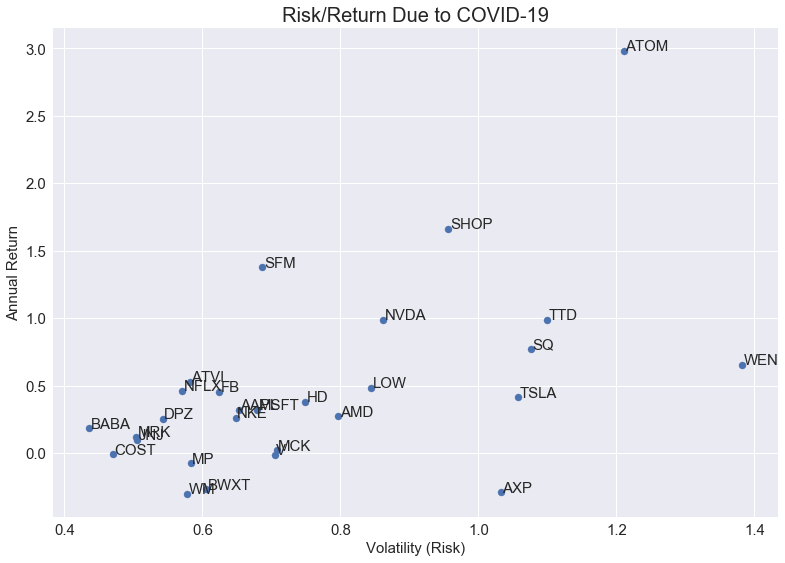

In [57]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Volatility (Risk)", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Risk/Return Due to COVID-19", fontsize = 20)
plt.show()

Calculating the Sharpe Ratio including the Market Portfolio (MP):

In [58]:
risk_free_return = 0.018
risk_free_risk = 0

In [59]:
rf = [risk_free_return, risk_free_risk]
rf

[0.018, 0]

Sharpe Ratio of stocks and the Market Portfolio:

In [60]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe
AAPL,0.3219,0.6524,0.4658
AMD,0.2727,0.7971,0.3195
ATOM,2.9828,1.2107,2.4490
ATVI,0.5277,0.5816,0.8764
AXP,-0.2904,1.0329,-0.2986
BABA,0.1831,0.4363,0.3785
BWXT,-0.2675,0.6057,-0.4714
COST,-0.0088,0.4702,-0.0571
DPZ,0.2532,0.5424,0.4337
FB,0.4529,0.6242,0.6967


Notice that the Market Porfolo has a negative sharpe ratio, this generally moves we're expecting negative performance.

## Systematic and Unsystematic Risk  Including the Market Portfolio

Systematic risk refers to the risk inherent to the entire market or market segment. Systematic risk, also known as “undiversifiable risk,” “volatility” or “market risk,” affects the overall market, not just a particular stock or industry. This type of risk is both unpredictable and impossible to completely avoid. It cannot be mitigated through diversification, only through hedging or by using the correct asset allocation strategy.

Unsystematic risk is unique to a specific company or industry. Also known as “nonsystematic risk,” "specific risk," "diversifiable risk" or "residual risk," in the context of an investment portfolio, unsystematic risk can be reduced through diversification.

Variance is used to compare the relative performance of each asset in a portfolio:

In [61]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2)
summary

,Return,Risk,Sharpe,TotalRisk_var
AAPL,0.3219,0.6524,0.4658,0.4257
AMD,0.2727,0.7971,0.3195,0.6353
ATOM,2.9828,1.2107,2.4490,1.4657
ATVI,0.5277,0.5816,0.8764,0.3383
AXP,-0.2904,1.0329,-0.2986,1.0669
BABA,0.1831,0.4363,0.3785,0.1903
BWXT,-0.2675,0.6057,-0.4714,0.3669
COST,-0.0088,0.4702,-0.0571,0.2211
DPZ,0.2532,0.5424,0.4337,0.2942
FB,0.4529,0.6242,0.6967,0.3897


In statistics, covariance is a metric used to measure how one random variable moves in relation to another random variable. In investment, covariance of returns measures how the rate of return on one asset varies in relation to the rate of return on other assets or a portfolio.

In [62]:
COV = ret.cov()*252
# COV, if we add "COV" it'll create a long chart

In [63]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [64]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AAPL,0.3219,0.6524,0.4658,0.4257,0.3578,0.0679
AMD,0.2727,0.7971,0.3195,0.6353,0.3797,0.2557
ATOM,2.9828,1.2107,2.4490,1.4657,0.4164,1.0493
ATVI,0.5277,0.5816,0.8764,0.3383,0.2007,0.1376
AXP,-0.2904,1.0329,-0.2986,1.0669,0.5192,0.5477
BABA,0.1831,0.4363,0.3785,0.1903,0.1987,-0.0084
BWXT,-0.2675,0.6057,-0.4714,0.3669,0.2101,0.1568
COST,-0.0088,0.4702,-0.0571,0.2211,0.2111,0.0100
DPZ,0.2532,0.5424,0.4337,0.2942,0.1537,0.1406
FB,0.4529,0.6242,0.6967,0.3897,0.3125,0.0772


### Systematic and Unsystematic risk of stocks including the Market Portfolio (MP = S&P500 Index):

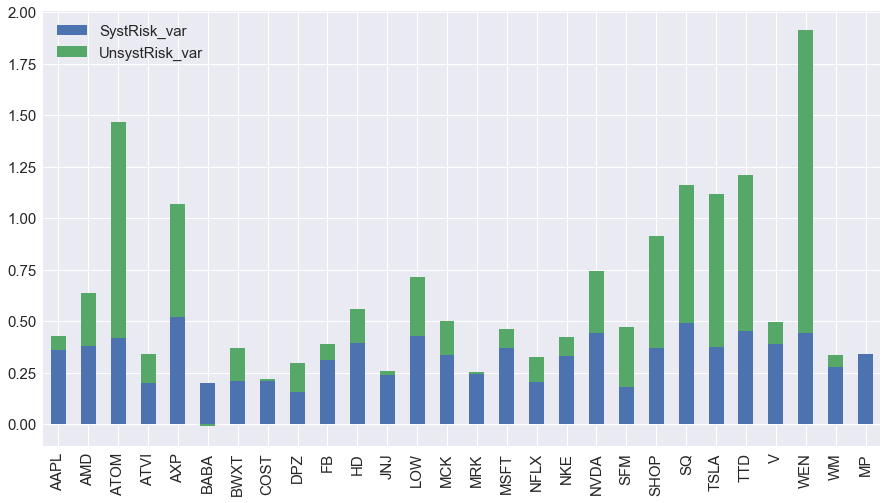

In [65]:
summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In general we want a balance between systematic and unsystematic risk. Systematic risk has to do with the stock getting affected by the overall market, and the stocks in this portfolio that gets affected by the market condidtions the most due to COVID-19 are AAPL, BABA, COST, FB, JNJ, MCK, MRK, MSFT, NKE, V, WM, and NVDA . The stocks that have the highest Unsystematic risk also company specific risk are ATOM, AXP, SFM, SHOP, SQ, TSLA, TTD, and WEN. BWXT and DPZ seem to have a decent balance between systematic and unsystematic risk. 

Determining the beta of the stocks in the portfolio compared to the Market Portfolio (S&P 500 Index):

Beta is a measure of the volatility (Risk), or systematic risk, of a security or portfolio, in comparison to the market as a whole. 

In [66]:
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
AAPL,0.3219,0.6524,0.4658,0.4257,0.3578,0.0679,1.0513
AMD,0.2727,0.7971,0.3195,0.6353,0.3797,0.2557,1.1157
ATOM,2.9828,1.2107,2.4490,1.4657,0.4164,1.0493,1.2235
ATVI,0.5277,0.5816,0.8764,0.3383,0.2007,0.1376,0.5897
AXP,-0.2904,1.0329,-0.2986,1.0669,0.5192,0.5477,1.5258
BABA,0.1831,0.4363,0.3785,0.1903,0.1987,-0.0084,0.5839
BWXT,-0.2675,0.6057,-0.4714,0.3669,0.2101,0.1568,0.6173
COST,-0.0088,0.4702,-0.0571,0.2211,0.2111,0.0100,0.6204
DPZ,0.2532,0.5424,0.4337,0.2942,0.1537,0.1406,0.4516
FB,0.4529,0.6242,0.6967,0.3897,0.3125,0.0772,0.9182


Stocks with the beta above 1, means that they get largely affected by market condidtions in a postive and a negative way due to systematic risk. If the S&P 500 were to drop around 5%, these stocks would be likely to drop towards 8 to 10% in a day and if the S&P500 would of rallyed 5% then those stocks would gained 8 to 10% in a day. In other words high beta stock tend to have more risk, with greater risk comes greater potential reward.  

## Determining The Security Market Line

The security market line is an investment evaluation tool derived from the CAPM—a model that describes risk-return relationship for securities—and is based on the assumption that investors need to be compensated for both the time value of money (TVM) and the corresponding level of risk associated with any investment, referred to as the risk premium.

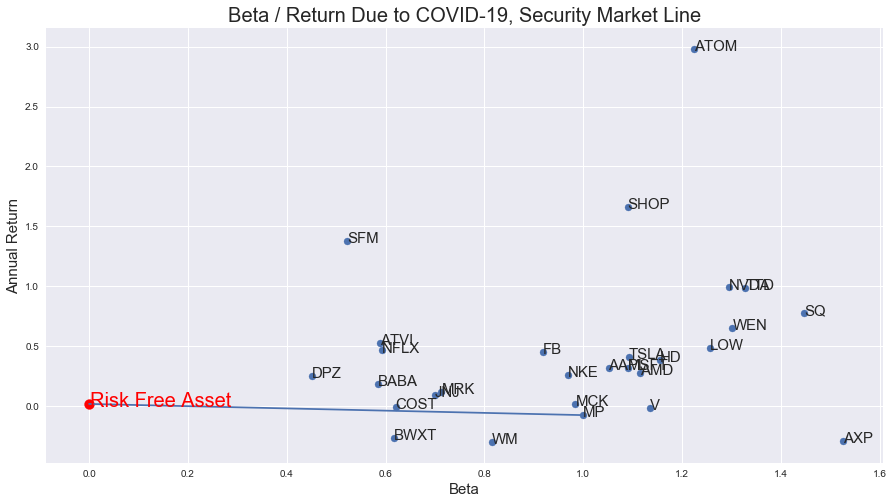

In [67]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["MP", "beta"]], [rf[0], summary.loc["MP", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "red")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "Red")
plt.xlabel("Beta", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Beta / Return Due to COVID-19, Security Market Line", fontsize = 20)
plt.show()

Security Market Line Analysis: Stocks that fall below the SML is an indictor that they are underperforming the market. Meanwhile stocks above the SML indicate that they are outperforming the market.

### Including the Capital Asset Pricing Model and Alpha of the stocks with the Market Portfolio

The Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk and expected return for assets, particularly stocks. CAPM is widely used throughout finance for pricing risky securities and generating expected returns for assets given the risk of those assets and cost of capital.

"Alpha" (the Greek letter α) is a term used in investing to describe a strategy's ability to beat the market, or it's "edge." Alpha is thus also often referred to as “excess return” or “abnormal rate of return,” which refers to the idea that markets are efficient, and so there is no way to systematically earn returns that exceed the broad market as a whole. Alpha is often used in conjunction with beta (the Greek letter β) , which measures the broad market's overall volatility or risk, known as systematic market risk

In [68]:
summary["capm_ret"] = rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.beta

In [69]:
summary["alpha"] = summary.Return - summary.capm_ret
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AAPL,0.3219,0.6524,0.4658,0.4257,0.3578,0.0679,1.0513,-0.0802,0.4021
AMD,0.2727,0.7971,0.3195,0.6353,0.3797,0.2557,1.1157,-0.0862,0.3589
ATOM,2.9828,1.2107,2.4490,1.4657,0.4164,1.0493,1.2235,-0.0963,3.0791
ATVI,0.5277,0.5816,0.8764,0.3383,0.2007,0.1376,0.5897,-0.0371,0.5648
AXP,-0.2904,1.0329,-0.2986,1.0669,0.5192,0.5477,1.5258,-0.1245,-0.1659
BABA,0.1831,0.4363,0.3785,0.1903,0.1987,-0.0084,0.5839,-0.0365,0.2197
BWXT,-0.2675,0.6057,-0.4714,0.3669,0.2101,0.1568,0.6173,-0.0397,-0.2279
COST,-0.0088,0.4702,-0.0571,0.2211,0.2111,0.0100,0.6204,-0.0399,0.0311
DPZ,0.2532,0.5424,0.4337,0.2942,0.1537,0.1406,0.4516,-0.0242,0.2774
FB,0.4529,0.6242,0.6967,0.3897,0.3125,0.0772,0.9182,-0.0678,0.5207


CAPM Analysis: Since we know that the CAPM is used for determining expected returns on stocks, we can notice that each stock is expected to reach positve returns, We can also notice that stocks with the highest betas are expected to have higher returns. This could of course change do to systematic condidtons.  

Alpha Analysis: Understanding that Alpha is used to determine whether or not a stock would beat the overall market. We can notice that stocks in the Portfolio that have a chance of not beating the over all market are the stocks below the Security Market Line.